In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
from cleverhans.tf2.attacks import fast_gradient_method as FGSM

In [2]:
df_train_1 = pd.read_csv("https://raw.githubusercontent.com/Tdjaaleb/IDS_AdversarialML/main/Data/multi_data_train_0.csv")
df_train_2 = pd.read_csv("https://raw.githubusercontent.com/Tdjaaleb/IDS_AdversarialML/main/Data/multi_data_train_1.csv")

df_train = pd.concat([df_train_1, df_train_2], axis=0, ignore_index=True)

df_test = pd.read_csv("https://raw.githubusercontent.com/Tdjaaleb/IDS_AdversarialML/main/Data/multi_data_test.csv")

In [3]:
df_train = df_train.sort_index(axis=1)
df_test = df_test.sort_index(axis=1)

In [4]:
df_tensor_input_Train=tf.convert_to_tensor(df_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'], axis=1))
df_tensor_output_Train=tf.convert_to_tensor(df_train[['Dos','normal','Probe','R2L','U2R']]) 

df_tensor_input_Test=tf.convert_to_tensor(df_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'], axis=1))
df_tensor_output_Test=tf.convert_to_tensor(df_test[['Dos','normal','Probe','R2L','U2R']]) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3937/3937 [==============================] - 5s 1ms/step - loss: 0.1427 - accuracy: 0.9550
Epoch 2/100
3937/3937 [==============================] - 4s 1ms/step - loss: 0.0884 - accuracy: 0.9700
Epoch 3/100
3937/3937 [==============================] - 4s 1ms/step - loss: 0.0792 - accuracy: 0.9735
Epoch 4/100
3937/3937 [==============================] - 4s 1ms/step - loss: 0.0745 - accuracy: 0.9752
Epoch 5/100
3937/3937 [===============

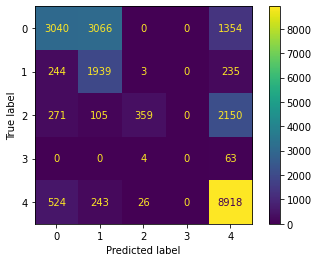

In [5]:
mlp = tf.keras.Sequential()
mlp.add(tf.keras.layers.Dense(units=50, input_dim=df_tensor_input_Train.shape[1], activation="relu"))
mlp.add(tf.keras.layers.Dense(units=5, activation="softmax"))
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp.summary()

mlp.fit(df_tensor_input_Train, df_tensor_output_Train, epochs=100)

pred = mlp.predict(df_tensor_input_Test)

pred_df = pd.DataFrame(pred,columns=df_train[['Dos','normal','Probe','R2L','U2R']].columns)

pred_df = pred_df.idxmax(axis=1)

print("Recall Score - ",recall_score(df_test['label'],pred_df, average='micro'))
print("F1 Score - ",f1_score(df_test['label'],pred_df,average='micro'))
print("Precision Score - ",precision_score(df_test['label'],pred_df,average='micro'))
print("Accuracy Score - ", accuracy_score(df_test['label'],pred_df))

cm = confusion_matrix(df_test['label'], pred_df)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
adv = FGSM.fast_gradient_method(mlp, df_tensor_input_Train, 0.2, np.inf)
adv_df = pd.DataFrame(adv.numpy())
adv_df.columns = df_train.columns.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'])

mlp.fit(adv_df, df_tensor_output_Train, epochs=10)

pred = mlp.predict(df_tensor_input_Test)

In [ ]:
pred_df = pd.DataFrame(pred,columns=df_train[['Dos','normal','Probe','R2L','U2R']].columns)


In [ ]:
pred_df.max(axis=1).describe()

In [ ]:
pred_df.axes[1]

In [ ]:
pred_df.iloc[[1]].max(axis=1)

In [ ]:
pred_df[pred_df.axes[1][2]].iloc[[0]][0]

In [ ]:
pred_df.iloc[[0]].max(axis=1)[0]

In [ ]:
pred_state=[]

for i in range(0,pred_df.shape[0]):
  for j in range(0,pred_df.shape[1]):
    if pred_df[pred_df.axes[1][j]].iloc[[i]][0]==pred_df.iloc[[i]].max(axis=1)[0]:
        pred_state.append(pred_df.axes[1][j])


In [ ]:

for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

pred_df = pd.DataFrame(pred,columns=Train[['Dos','normal','Probe','R2L','U2R']].columns)

print("Recall Score - ",recall_score(Test[['Dos','normal','Probe','R2L','U2R']],pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(Test[['Dos','normal','Probe','R2L','U2R']],pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(Test[['Dos','normal','Probe','R2L','U2R']],pred_df.astype('uint8'),average='micro'))
print("Accuracy Score - ", accuracy_score(Test[['Dos','normal','Probe','R2L','U2R']],pred_df.astype('uint8')))

In [ ]:
pred.shape

In [ ]:
true_state = []
pred_state = []

for i in range(0,pred.shape[0]):
    lab = ["Dos","normal","Probe","R2L","U2R"]
    for j in range(0,pred.shape[1]):
        if pred[i][j]==1:
            true_state.append(Test["label"])
            pred_state.append(lab[j])